# K-Means

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from wrangle import iris_df, get_distances
from explore import scatter_plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# To ignore FutureWarning specifically:
warnings.filterwarnings("ignore", category=FutureWarning)

## 1

### Clustering with the Iris Dataset

### Using this lesson as a guide, perform clustering on the iris dataset.

#### a) Choose features other than the ones used in the lesson.

In [2]:
# Load the Iris dataset
# Clean up the column names
# Split the DataFrame into train, val, and test sets
train, val, test = iris_df()

In [3]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
82,5.5,2.4,3.7,1.0,versicolor
134,6.3,2.8,5.1,1.5,virginica
138,6.4,3.1,5.5,1.8,virginica
76,6.6,3.0,4.4,1.4,versicolor
110,7.2,3.6,6.1,2.5,virginica


In [4]:
def get_distances(list_a, list_b):
    # initialize an empty list to toss the
    # differences into
    difs = []
    # for every comparison of dims in the points:
    for a_i, b_i in zip(list_a, list_b):
        difs.append((a_i - b_i) ** 2)
    return sum(difs) ** .5

In [5]:
point_a = [0, 1, 3]
point_b = [6, 10, 30]
get_distances(point_a, point_b)

29.086079144497972

In [6]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
scaler = MinMaxScaler()
train[['sepal_width', 'petal_width']] = \
scaler.fit_transform(train[['sepal_width', 'petal_width']])

In [8]:
feats = ['sepal_width', 'petal_width']

In [9]:
# lets create some centroids:
centroid = {
    0: [0,0],
    1: [0.5, 0.5],
    2: [0.8,0.8]
}

In [10]:
def assign_clusters():
    # initialize a place to toss cluster assignments
    cluster_assignments = []
    #iterate through every row in the dataframe:
    for i, row in train[feats].iterrows():
        # print('========')
        # toss our centroid distances somewhere:
        distances = []
        # iterate through every centroid
        for n in centroid.keys():
            # use our distance function to calc the 
            #distance between each data point and the centroids
            distances.append(get_distances(centroid[n], row.values))
        # use the distances list,
        # cast it as a series, use index of the min to link
        # back to the dictionay keys
        cluster = pd.Series(distances).idxmin()
        cluster_assignments.append(cluster)
        # print('--------')
    return cluster_assignments

In [11]:
train['cluster'] = assign_clusters()

In [12]:
# update the centroids:
# iterate through the groups:
for i in train.cluster.unique():
    centroid[i] = train[
        ['sepal_width', 'petal_width', 'cluster']
    ].groupby('cluster').mean().values[i]

In [13]:
feats_with_cluster = ['sepal_width', 'petal_width', 'cluster']

In [14]:
# Performing clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(train[feats])

#### b) Visualize the results of your clustering.

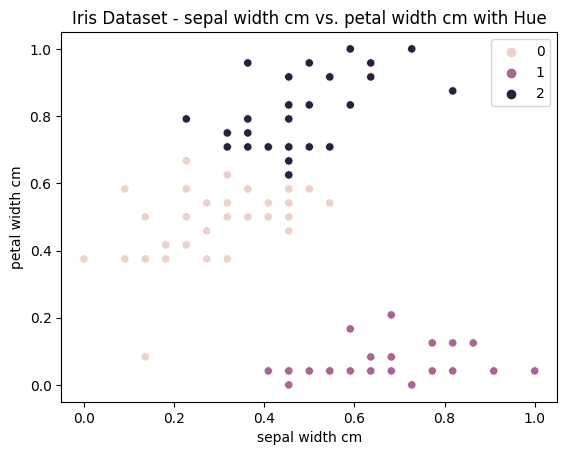

In [15]:
# Create a scatter plot using the custom scatter_plot function to visualize the relationship between
# 'petal_length' and 'petal_width' in the 'train' DataFrame, with data points color-coded by 'species'.
scatter_plot(train, 'sepal_width', 'petal_width', clusters, 'sns')

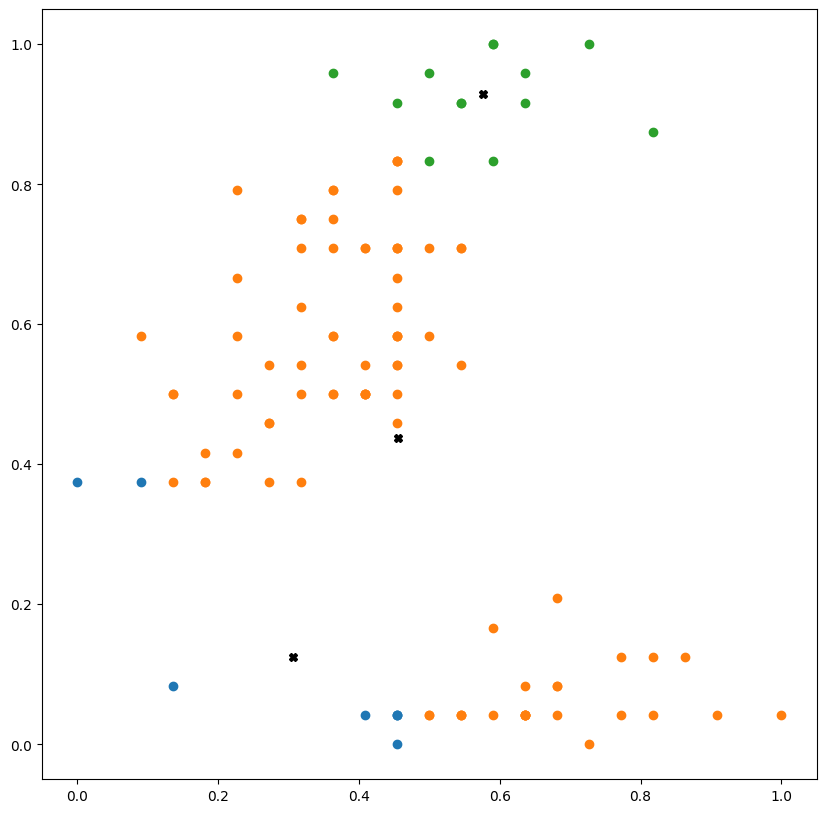

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for cluster, subset in train[feats_with_cluster].groupby(
    'cluster'):
    ax.scatter(subset['sepal_width'], subset['petal_width'], label=cluster)
for i in centroid.keys():
    # unpack the dimensions associated with the data point in the dictionary
    ax.plot(*centroid[i], marker='X', c='black')
plt.show()

#### c) Use the elbow method to visually select a good value for k.  

In [17]:
# Use the Elbow Method to select a good value for k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train[feats])
    wcss.append(kmeans.inertia_)

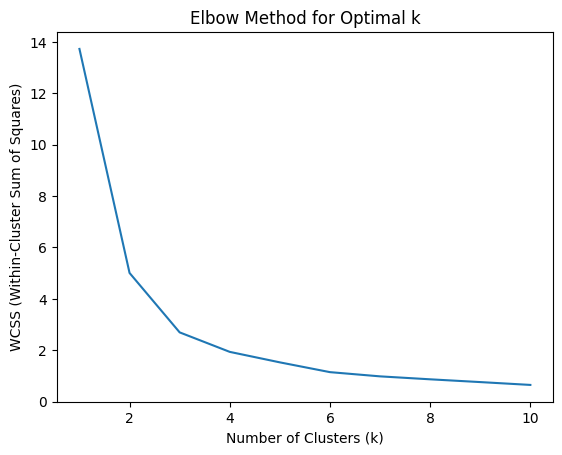

In [18]:
# Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### d) Repeat the clustering, this time with 3 different features.

In [19]:
# Select the features for clustering
X = train[['sepal_length', 'petal_length']]

In [20]:
# Standardize the data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

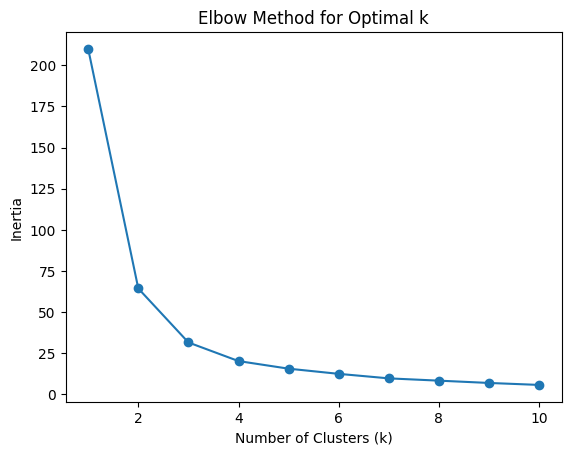

In [21]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [22]:
# Fit K-Means with the chosen value of k
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Get cluster assignments
cluster_assignments = kmeans.labels_

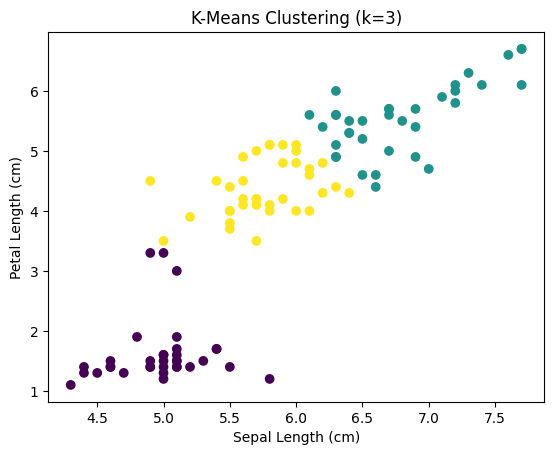

In [23]:
# Visualize the clusters
plt.scatter(X['sepal_length'], X['petal_length'], c=cluster_assignments, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Means Clustering (k=3)')
plt.show()